In [104]:
import pandas as pd
dataframe=pd.read_csv('testset.csv')

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Clean the Data

In [105]:
del dataframe[' _precipm']
del dataframe[' _hail']
del dataframe[' _snow']
del dataframe[' _tornado']
del dataframe[' _windchillm']
dataframe.fillna(0)


,datetime_utc,_conds,_dewptm,_fog,_heatindexm,_hum,_pressurem,_rain,_tempm,_thunder,_vism,_wdird,_wdire,_wgustm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0.0,27.0,1010.0,0,30.0,0,5.0,280.0,West,0.0,7.4
1,19961101-12:00,Smoke,10.0,0,0.0,32.0,-9999.0,0,28.0,0,0.0,0.0,North,0.0,0.0
2,19961101-13:00,Smoke,11.0,0,0.0,44.0,-9999.0,0,24.0,0,0.0,0.0,North,0.0,0.0
3,19961101-14:00,Smoke,10.0,0,0.0,41.0,1010.0,0,24.0,0,2.0,0.0,North,0.0,0.0
4,19961101-16:00,Smoke,11.0,0,0.0,47.0,1011.0,0,23.0,0,1.2,0.0,North,0.0,0.0
5,19961101-17:00,Smoke,12.0,0,0.0,56.0,1011.0,0,21.0,0,0.0,0.0,North,0.0,0.0
6,19961101-18:00,Smoke,13.0,0,0.0,60.0,1010.0,0,21.0,0,0.8,0.0,North,0.0,0.0
7,19961101-19:00,Smoke,13.0,0,0.0,60.0,-9999.0,0,21.0,0,0.0,0.0,North,0.0,0.0
8,19961101-20:00,Smoke,13.0,0,0.0,68.0,-9999.0,0,19.0,0,0.0,0.0,North,0.0,0.0
9,19961101-21:00,Smoke,13.0,0,0.0,68.0,1010.0,0,19.0,0,0.0,0.0,North,0.0,0.0


# Line Graphs

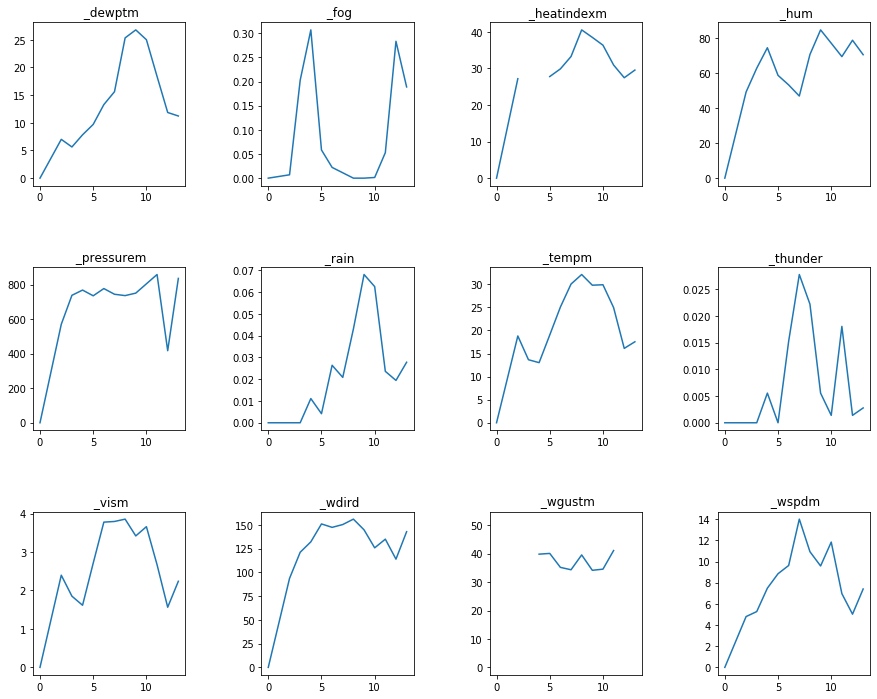

In [100]:
fig ,axis = plt.subplots(nrows=3 , ncols=4 ,figsize=(15 , 12))

 

fig.subplots_adjust(hspace=0.5,wspace=0.5)

weather=dataframe

if ' _wdire' in weather.columns:

    del weather[' _wdire']

s= weather.columns

s=s[2:]

col =0

for j in range(0, len(s)):

    k=(j%4)

    data = dataframe[s[j]]

    x=[0]

    y=[0]

    for i in range(720,720*13, 720 ):

        if i==0:

            pass

        aa = data[(i-720) : i ].mean()

        y.append(aa)

        x.append((i/720)+1)

       
    axis[col][k].plot(x,y)

    axis[col][k].set_title(s[j])

    if k==3:

        col+=1


# PieCharts

In [101]:
import datetime as dt
dataframe['Date'] = pd.to_datetime(dataframe['datetime_utc'])
dataframe['month'] = dataframe['Date'].dt.month
g=dataframe.groupby('month')

January


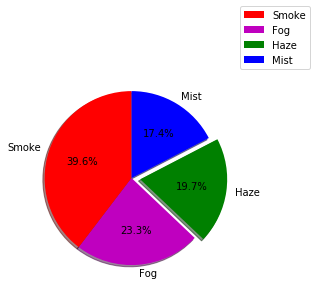

February


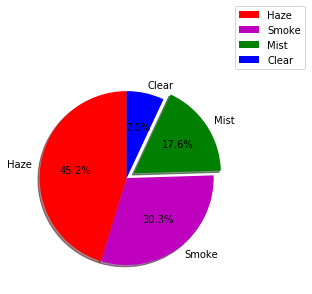

March


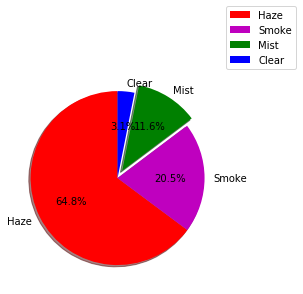

April


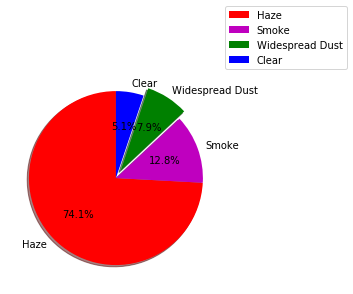

May


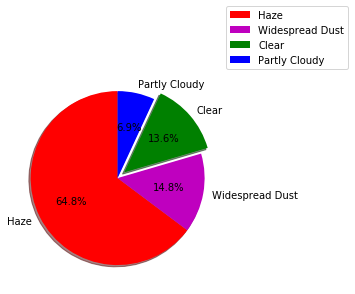

June


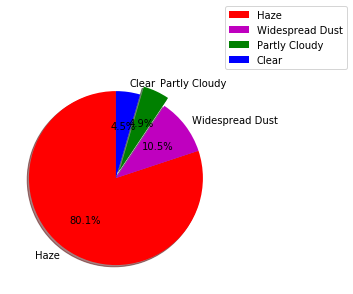

July


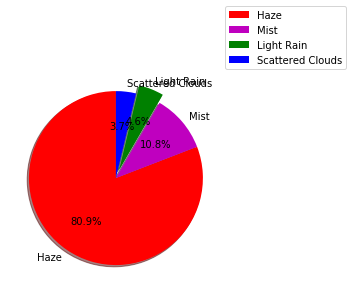

August


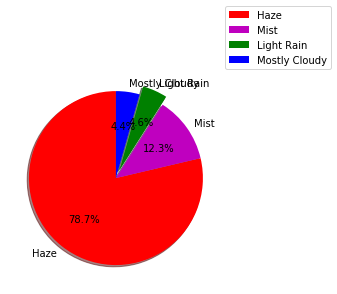

September


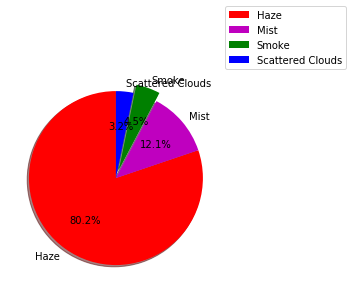

October


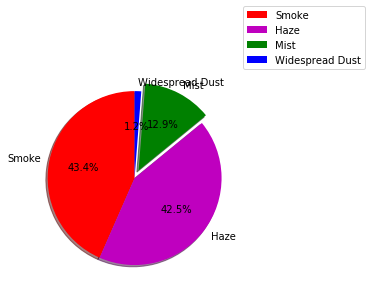

November


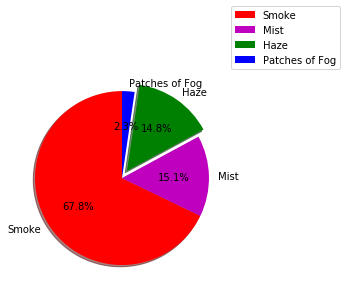

December


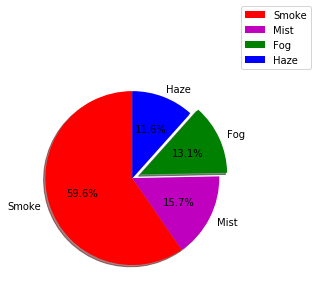

In [102]:
l=dict(l)
f=['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
for i in range(1,13):
    t=g.get_group(i)
    count=t[' _conds'].value_counts()
    count=count[0:4]
    colors = ['r', 'm', 'g', 'b','b']
    #print(count)
    condition=count.index
    condition=condition[0:4]
    print(f[i-1])
    plt.pie(count, labels=condition, colors=colors, shadow=True,
       explode=(0,0,0.1,0), autopct="%1.1f%%", startangle=90)

    plt.legend(loc=(1,1))

    plt.show()
